In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [56]:
dataframe = pd.read_csv("E:\\Project\\Zomato-data-.csv")
dataframe.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [58]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [59]:
# change the data type of the rate column
dataframe['rate'] = dataframe['rate'].str.replace("/5","",regex= False).astype(float)

In [60]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [62]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [63]:
dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### Exploring  Restruant type

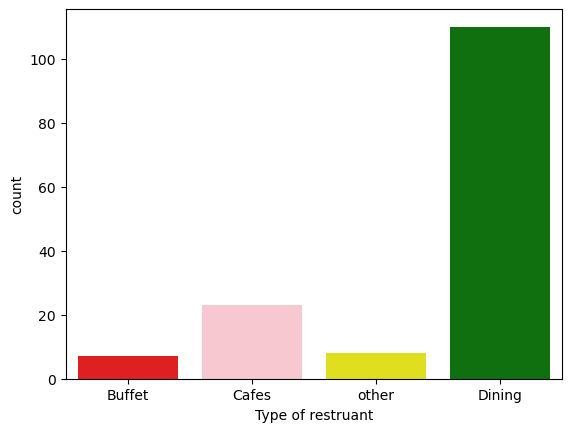

In [64]:
sns.countplot(x = "listed_in(type)", hue = "listed_in(type)",data = dataframe,palette = ["red","pink","yellow","green"],legend=False)
plt.xlabel("Type of restruant")
plt.show()

conculsion: The majority of the restruants fall into the dinning category

Text(0, 0.5, 'Votes')

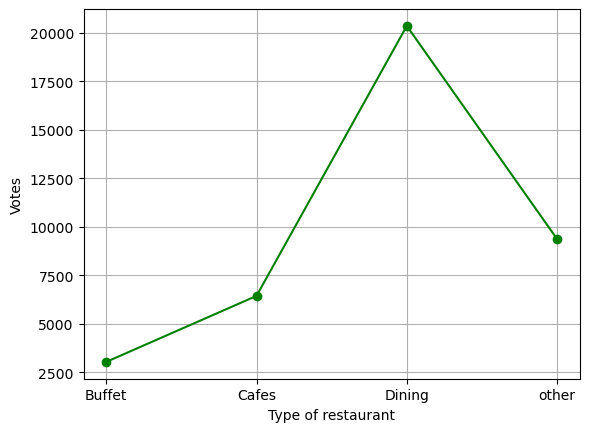

In [65]:
# voted by Restaurant Type
grouped_data = dataframe.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes":grouped_data})
plt.grid()
plt.plot(result,c = "green",marker = "o")
plt.xlabel("Type of restaurant")
plt.ylabel("Votes")

conslusion: Dining restruants are preferred by a larger number of individuals.

In [66]:
# Indentify the Most Voted Restaurant
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes']==max_votes,'name']

In [67]:
max_votes,restaurant_with_max_votes

(4884,
 38    Empire Restaurant
 Name: name, dtype: object)

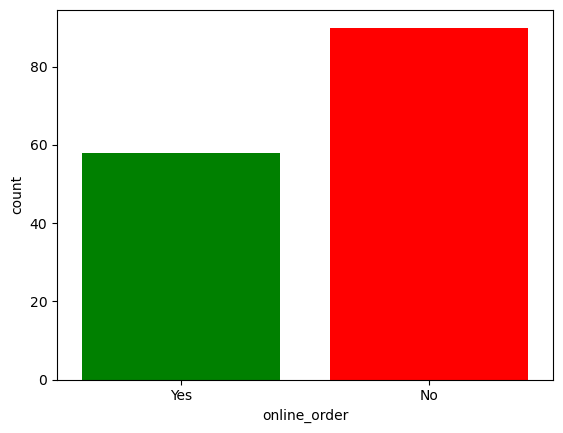

In [68]:
# Online Order Availability 
ax = sns.countplot(x = dataframe['online_order'])
colors = ["green","red"]
for bar, color in zip(ax.patches,colors):
    bar.set_facecolor(color)

consulsion: This suggest that a majority of the restaurants do not accepte online orders

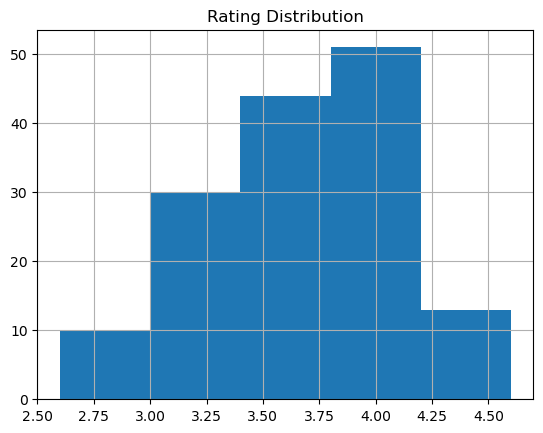

In [69]:
# Analyze Rating.
plt.hist(dataframe['rate'],bins=5)
plt.title("Rating Distribution")
plt.grid()
plt.show()


conslusion: The majority of restaurants received ratings ranging from 3.5 to 4

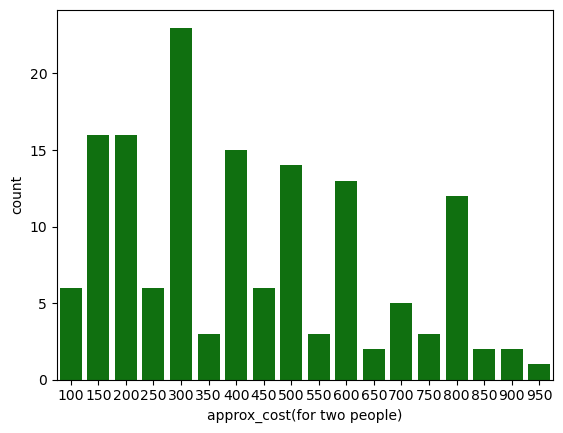

In [82]:
# Apporximate cost for cuples
sns.countplot(x = "approx_cost(for two people)", data = dataframe,color="green")
plt.show()

conslusion: The majority of couples prefers restruants with an approximate cost of 300 rupees

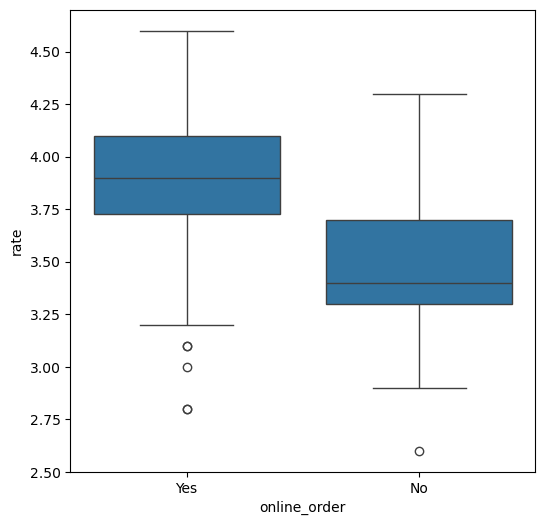

In [73]:
# Rating online vs offline order
plt.figure(figsize=(6,6))
sns.boxplot(x = "online_order",y = "rate", data = dataframe)
plt.show()

conslusion: offline orders received lower rating in comparison to online orders which obtained excellent rating

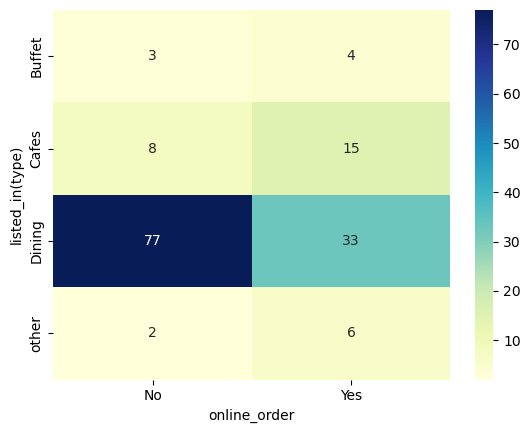

In [90]:
# Order Mode Preferences by Restaurant Type
pivot_table = dataframe.pivot_table(index= 'listed_in(type)', 
                                    columns="online_order",aggfunc="size",fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap= "YlGnBu",fmt="d")
plt.show()

This we can say that dining restaurants primarily accept offline orders 
where cafes primarily receive online orders. this suggest that clients prefer to place orders in person at
restaurants but prefer online ordering at cafes.